
Training with class weights (no resampling)...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8930 - loss: 0.6832 - val_accuracy: 0.0474 - val_loss: 0.7474
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0722 - loss: 0.6582 - val_accuracy: 0.4474 - val_loss: 0.6955
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3870 - loss: 0.7019 - val_accuracy: 0.8000 - val_loss: 0.6240
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8216 - loss: 0.5387 - val_accuracy: 0.3789 - val_loss: 0.8878
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5797 - loss: 0.6269 - val_accuracy: 0.3632 - val_loss: 0.8792
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6402 - loss: 0.5598 - val_accuracy: 0.7421 - val_loss: 0.5122
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7063 - loss: 0.4708 - val_accuracy: 0.8789 - val_loss: 0.2730
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7646 - loss: 0.6308 - val_accuracy: 0.8684 - val_loss: 0.

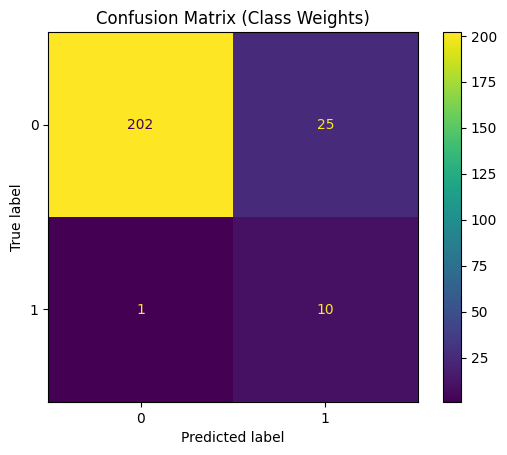


Training with SMOTE (only training data resampled)...
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6159 - loss: 0.6517 - val_accuracy: 0.5868 - val_loss: 0.8301
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7762 - loss: 0.4582 - val_accuracy: 0.8430 - val_loss: 0.5612
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8278 - loss: 0.3899 - val_accuracy: 0.9229 - val_loss: 0.3111
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8361 - loss: 0.3537 - val_accuracy: 0.9725 - val_loss: 0.2004
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8553 - loss: 0.3183 - val_accuracy: 0.9284 - val_loss: 0.2919
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8837 - loss: 0.2726 - val_accuracy: 0.7025 - val_loss: 0.6620
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8607 - loss: 0.3040 - val_accuracy: 0.8485 - val_loss: 0.4010
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8910 - loss: 0.2547 - val_accuracy: 0.8485 - val_loss: 0.3696


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

=== Performance with SMOTE (Train Only) ===
              precision    recall  f1-score   support

         0.0     0.9951    0.9031    0.9469       227
         1.0     0.3125    0.9091    0.4651        11

    accuracy                         0.9034       238
   macro avg     0.6538    0.9061    0.7060       238
weighted avg     0.9636    0.9034    0.9246       238

ROC AUC Score: 0.9636


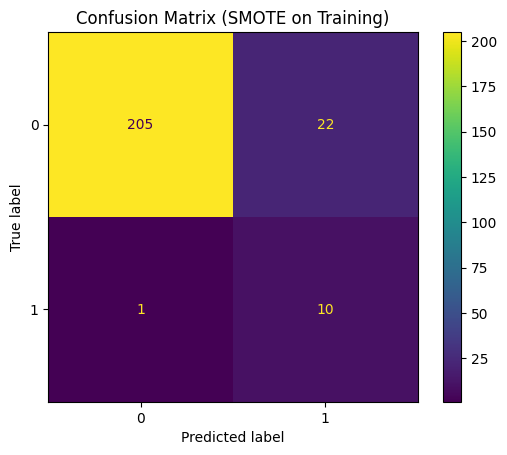

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from imblearn.over_sampling import SMOTE

df = pd.read_csv("f1.csv") 

features = ['SST_MIN', 'SST_MAX', 'SSTA@90th_HS', 'DHW_from_90th_HS>1',
            'Salinity', 'pH_total', 'fCO2', 'IOD', 'ENSO']
target = 'Bleaching'

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

sequence_length = 12
X_seq, y_seq = [], []
for i in range(len(df) - sequence_length):
    X_seq.append(df[features].iloc[i:i + sequence_length].values)
    y_seq.append(df[target].iloc[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)

#class weights
print("\nTraining with class weights (no resampling)...")
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights_dict = dict(enumerate(class_weights))

model_weighted = Sequential([
    LSTM(64, input_shape=(sequence_length, len(features))),
    Dense(1, activation='sigmoid')
])
model_weighted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_weighted.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2,
                   class_weight=class_weights_dict, verbose=1)

y_pred_prob = model_weighted.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n=== Performance with Class Weights ===")
print(classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[0, 1]).plot()
plt.title("Confusion Matrix (Class Weights)")
plt.show()

#smote
print("\nTraining with SMOTE (only training data resampled)...")

X_train_flat = X_train.reshape((X_train.shape[0], -1))
smote = SMOTE()
X_train_resampled_flat, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

X_train_resampled = X_train_resampled_flat.reshape((X_train_resampled_flat.shape[0], sequence_length, len(features)))

model_smote = Sequential([
    LSTM(64, input_shape=(sequence_length, len(features))),
    Dense(1, activation='sigmoid')
])
model_smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_smote.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob_res = model_smote.predict(X_test).flatten()
y_pred_res = (y_pred_prob_res > 0.5).astype(int)

print("\n=== Performance with SMOTE (Train Only) ===")
print(classification_report(y_test, y_pred_res, digits=4))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_res):.4f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_res), display_labels=[0, 1]).plot()
plt.title("Confusion Matrix (SMOTE on Training)")
plt.show()
